In [1]:
import pandas as pd

train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [2]:
from helpers.plotting_helpers import plot_correlation_map
%matplotlib inline

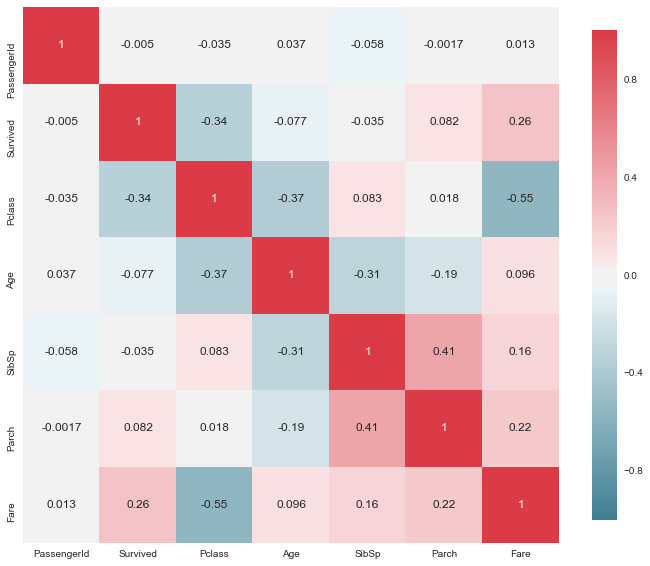

In [3]:
plot_correlation_map(train)